In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
## List of tickers for which we want to extract the data 

tickers = ["AZN","MRNA","GSK"]

In [3]:
def get_data(tickers_list):
    
    """
    
    Extracts historical stock price data from Yahoo Finance 
    
    Input:
        tickers : List of company tickers for which the data is to be extracted
    
    Returns: 
        all_data: data frame with the stock price of the requested actifs for the last year
    """

    all_data = pd.DataFrame()

    for ticker in tickers:

        url = "https://query1.finance.yahoo.com/v7/finance/download/" + ticker +"?period1=1563321600&period2=1594944000&interval=1d&events=history"

        data = pd.read_csv(url,parse_dates=['Date'],index_col=['Date'])

        data["ticker"] = ticker

        all_data = all_data.append(data)


    ## Save full data frame 

    all_data.to_csv('all_data.csv',index=True)
    
    return all_data



In [4]:
## Create desired data frame

all_data = get_data(tickers)

/Users/Paco/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


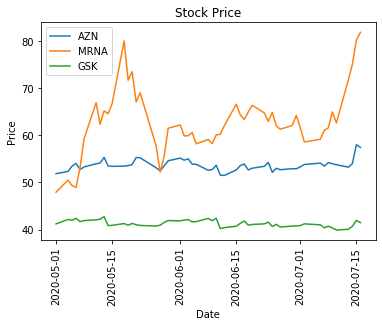

In [5]:
## Program the chart

for ticker in tickers:

    test = all_data.loc[(all_data['ticker'] == ticker) & (all_data.index >= "2020-05-01")] 
    
    plt.plot(test["Close"])
    
    plt.xticks(rotation=90)
    
    
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price')
plt.legend(tickers, loc='upper left')

